In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cases_year = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-24/cases_year.csv')

In [3]:
cases_year.head(2)

,region,country,iso3,year,total_population,annualized_population_most_recent_year_only,total_suspected_measles_rubella_cases,measles_total,measles_lab_confirmed,measles_epi_linked,measles_clinical,measles_incidence_rate_per_1000000_total_population,rubella_total,rubella_lab_confirmed,rubella_epi_linked,rubella_clinical,rubella_incidence_rate_per_1000000_total_population,discarded_cases,discarded_non_measles_rubella_cases_per_100000_total_population
0,AFRO,Algeria,DZA,2012,37646166,37646166,76.0,55,2,0,53,1.46,13,13,0,0,0.35,8.0,0.02
1,AFRO,Algeria,DZA,2013,38414172,38414172,85.0,0,0,0,0,0.00,29,29,0,0,0.75,56.0,0.15


In [4]:
year_df = cases_year.groupby(["year"])["measles_total"].sum().reset_index()

In [5]:
year_df

,year,measles_total
0,2012,112548
1,2013,178526
2,2014,290888
3,2015,247474
4,2016,180015
5,2017,168190
6,2018,276157
7,2019,541401
8,2020,93840
9,2021,59619


In [6]:
value_2019 = year_df.iloc[7, 1]

In [7]:
# Function to plot heatmap and annotate values based on threshold
def plot_heatmap(data, ax, threshold, threshold_annotation=None):
    sns.heatmap(data, linewidths=.5, square=True, cmap='Reds', cbar=False, ax=ax)
    
    # Highlight common countries 
    if common_countries:
        for tick in ax.get_yticklabels():
            if tick.get_text() in common_countries:
                tick.set_color('darkred')
                tick.set_fontweight('bold')

    # Annotate values above the threshold 
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            value = data.values[i, j]
            annotation_color = 'black'  

            # Change annotation color if value exceeds the threshold
            if threshold_annotation and value > threshold_annotation:
                annotation_color = 'white'

            # Thousands formatting
            if value > threshold:
                formatted_value = f'{value / 1000:.1f}k' if value >= 1000 else f'{value:.0f}'
                ax.text(j + 0.5, i + 0.5, formatted_value, 
                        ha='center', va='center', color=annotation_color, size=8, weight="bold")     

In [8]:
# Filter data
df1 = cases_year[cases_year["measles_total"] > 8000]
df2 = cases_year[cases_year["measles_incidence_rate_per_1000000_total_population"] > 350]

In [9]:
# Create pivot tables
hmap1 = df1.pivot_table(index='country', columns='year', values='measles_total').fillna(0)
hmap2 = df2.pivot_table(index='country', columns='year', values='measles_incidence_rate_per_1000000_total_population').fillna(0)

In [10]:
# Find common countries between hmap1 and hmap2
common_countries = set(hmap1.index).intersection(set(hmap2.index))

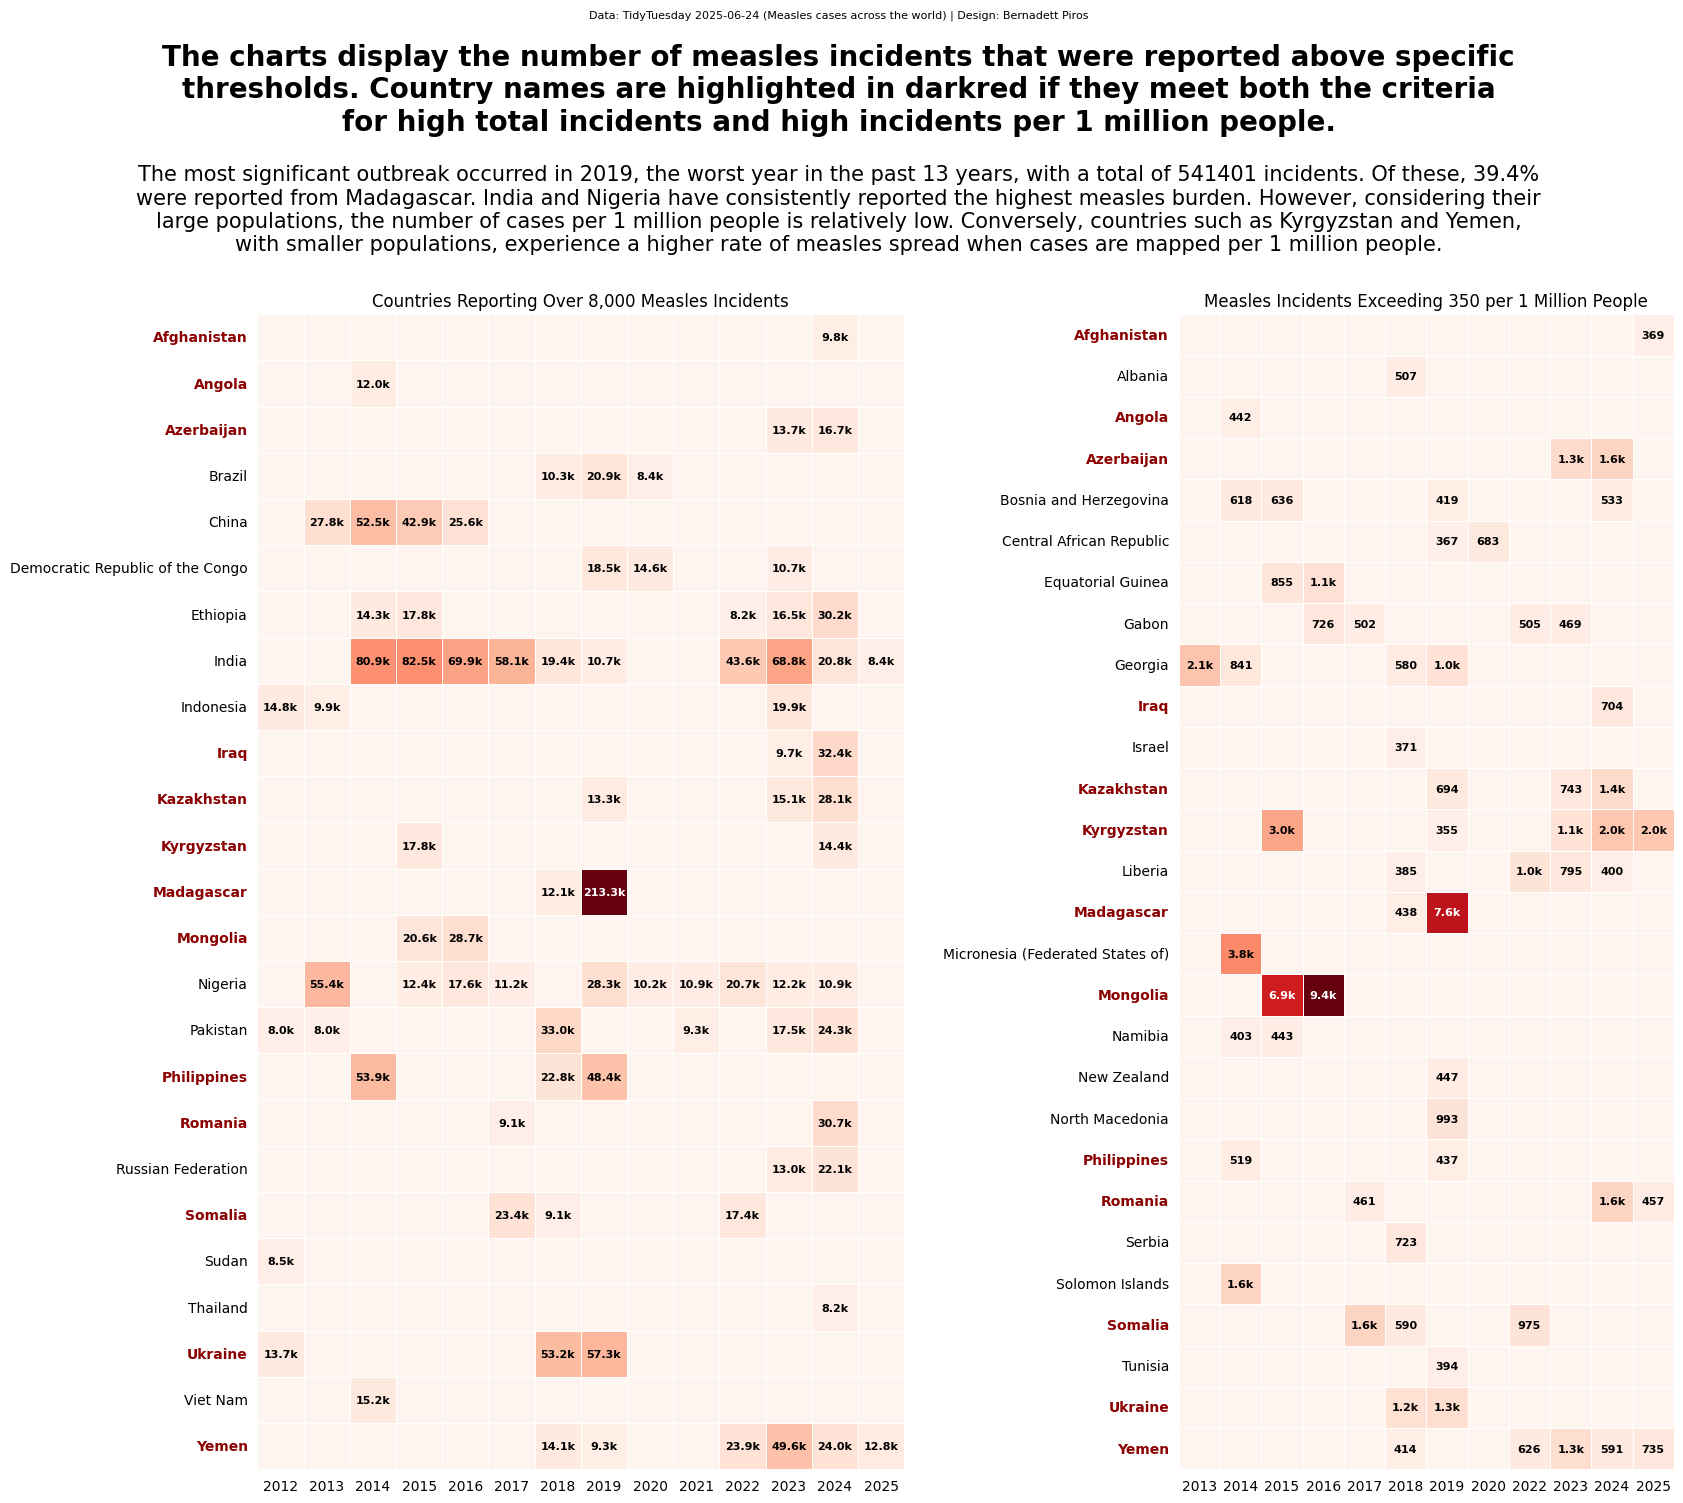

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 15))

plot_heatmap(hmap1, ax[0], threshold=8000, threshold_annotation=200000)
plot_heatmap(hmap2, ax[1], threshold=350, threshold_annotation=6000)

ax[0].set_title('Countries Reporting Over 8,000 Measles Incidents')
ax[1].set_title('Measles Incidents Exceeding 350 per 1 Million People')

for a in ax:    
    a.set_xlabel('')
    a.set_ylabel('')
    a.tick_params(left=False, bottom=False)

value_mdg = hmap1.at['Madagascar', 2019]
mdg_perc = (value_mdg / value_2019)*100

fig.text(0.43, 1.03, s="The charts display the number of measles incidents that were reported above specific\nthresholds. Country names are highlighted in darkred if they meet both the criteria\nfor high total incidents and high incidents per 1 million people.",
         size=20, weight="bold", ha="center", va="center")

fig.text(0.43, 0.95, s=f"The most significant outbreak occurred in 2019, the worst year in the past 13 years, with a total of {value_2019} incidents. Of these, {mdg_perc:.1f}%\nwere reported from Madagascar. India and Nigeria have consistently reported the highest measles burden. However, considering their\nlarge populations, the number of cases per 1 million people is relatively low. Conversely, countries such as Kyrgyzstan and Yemen,\nwith smaller populations, experience a higher rate of measles spread when cases are mapped per 1 million people.",
         size=15, ha="center", va="center")

fig.text(0.43, 1.08, "Data: TidyTuesday 2025-06-24 (Measles cases across the world) | Design: Bernadett Piros", size=8, ha="center", va="center")

plt.show()

#fig.savefig("2025-06-24.png", bbox_inches='tight', pad_inches=0.2)